# Experiment 8:
## Reconstruction with dithering, CIFAR-10, heavier tailed measurements

This experiment shows the behaviour of the regularized reconstruction method with dithering on the CIFAR-10 data set for various distributions for the measurements vectors using a generative model.

In [1]:
import numpy as np;
import numpy.linalg as linalg;

import matplotlib.pyplot as plt;
from matplotlib.pyplot import figure;

import pywt;

import torch;
import torch.nn as nn;
import torch.nn.functional as F;
import torch.optim as optim;

from torch.utils.data import DataLoader;
import torchvision;
import torchvision.transforms as transforms;

from torch.autograd import Variable

import pickle;
import time;
import random;
import math;

from IPython.display import clear_output;
from PIL import Image

import os

import CIFAR10_utils as CIFAR;
import CIFAR10_generative as generative;
import sparsity_utils as sparsity;
import general_utils as utils;

# Initialization

In [ ]:
(train_data, test_data), (train_loader, test_loader) = CIFAR.load_dataset();
noise = 0.1;

mspace = [2000, 10000, 20000];
lambda_space = np.linspace(1, 100, 25);

repetitions = 3;
img_num = 5;

# Varying lambda

In [ ]:
utils.reset_seeds();
autoEncoder = generative.createNetwork();
generative.trainNetwork(autoEncoder, train_loader);

projector = lambda x : generative.project(x, autoEncoder , num_epochs = 50, learning_rate = 0.001);

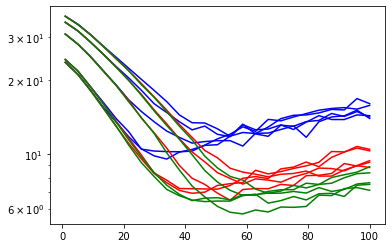

In [13]:
results_gauss = [[len(lambda_space)*[0] for j in range(img_num)] for i in range(len(mspace))];

utils.reset_seeds();
for i in range(len(mspace)):
    m = mspace[i];
    
    for j in range(img_num):
    x_true = CIFAR.getImageAsVector(test_loader, i);
    
        for k in range(len(lambda_space)):
            lamb = lambda_space[k];

            accum = 0;
            for n in range(repetitions):
                A, q = utils.generateMeasurements_Gaussian_dithering(x_true, m, noise, lamb);      
                y, acc, _ = CIFAR.reconstruct_regularized_dithering(A, q, lamb, x_true, projector, learning_param = 0.2, iterations = 25);
                accum += acc;
            results_gauss[i][j][k] = accum/repetitions;
            print(lamb);

        clear_output(wait=True);
        plt.yscale('log');
        for ii in range(i+1):
            for jj in range(j+1):
                col = 'b';
                if ii == 0:
                    col = 'b';
                elif ii == 1:
                    col = 'r';
                else:
                    col = 'g';
                plt.plot(lambda_space, results_gauss[ii][jj], c=col);
        plt.show();

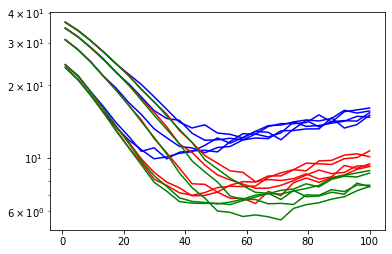

In [14]:
results_stt10 = [[len(lambda_space)*[0] for j in range(img_num)] for i in range(len(mspace))];

utils.reset_seeds();
for i in range(len(mspace)):
    m = mspace[i];
    
    for j in range(img_num):
    x_true = CIFAR.getImageAsVector(test_loader, i);
    
        for k in range(len(lambda_space)):
            lamb = lambda_space[k];
            
            accum = 0;
            for n in range(repetitions):
                A, q = generateMeasurements_StudentT_dithering(x_true, m, noise, 10 ,lamb);
                y, acc, _ = CIFAR.reconstruct_regularized_dithering(A, q, lamb, x_true, projector, learning_param = 0.2, iterations = 25);
                accum += acc[-1];
            results_stt10[i][j][k] = accum/repetitions;
            
            print(lamb);

        clear_output(wait=True);
        plt.yscale('log');
        for ii in range(i+1):
            for jj in range(j+1):
                col = 'b';
                if ii == 0:
                    col = 'b';
                elif ii == 1:
                    col = 'r';
                else:
                    col = 'g';
                plt.plot(lambda_space, results_stt10[ii][jj], c=col);
        plt.show();

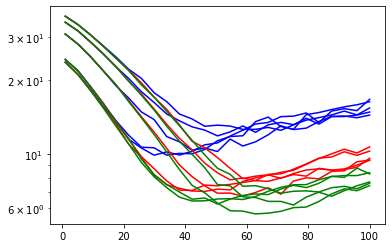

In [15]:
results_stt5 = [[len(lambda_space)*[0] for j in range(img_num)] for i in range(len(mspace))];

utils.reset_seeds();
for i in range(len(mspace)):
    m = mspace[i];
    
    for j in range(img_num):
    x_true = CIFAR.getImageAsVector(test_loader, i);
    
        for k in range(len(lambda_space)):
            lamb = lambda_space[k];

            accum = 0;
            for n in range(repetitions):
                A, q = generateMeasurements_StudentT_dithering(x_true, m, noise, 5 ,lamb);
                y, acc, _ = CIFAR.reconstruct_regularized_dithering(A, q, lamb, x_true, projector, learning_param = 0.2, iterations = 25);
                accum += acc;
            results_stt5[i][j][k] = accum/repetitions;
            print(lamb);

        clear_output(wait=True);
        plt.yscale('log');
        for ii in range(i+1):
            for jj in range(j+1):
                col = 'b';
                if ii == 0:
                    col = 'b';
                elif ii == 1:
                    col = 'r';
                else:
                    col = 'g';
                plt.plot(lambda_space, results_stt5[ii][jj], c=col);
        plt.show();

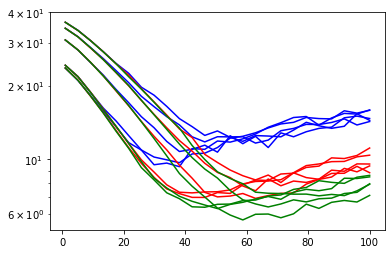

In [16]:
results_stt3 = [[len(lambda_space)*[0] for j in range(img_num)] for i in range(len(mspace))];

utils.reset_seeds();
for i in range(len(mspace)):
    m = mspace[i];
    
    for j in range(img_num):
    x_true = CIFAR.getImageAsVector(test_loader, i);
    
        for k in range(len(lambda_space)):
            lamb = lambda_space[k];

            accum = 0;
            for n in range(repetitions):
                A, q = generateMeasurements_StudentT_dithering(x_true, m, noise, 3 ,lamb);
                y, acc, _ = CIFAR.reconstruct_regularized_dithering(A, q, lamb, x_true, projector, learning_param = 0.2, iterations = 25);
                accum += acc;
            results_stt3[i][j][k] = accum/repetitions;
            print(lamb);


        clear_output(wait=True);
        plt.yscale('log');
        for ii in range(i+1):
            for jj in range(j+1):
                col = 'b';
                if ii == 0:
                    col = 'b';
                elif ii == 1:
                    col = 'r';
                else:
                    col = 'g';
                plt.plot(lambda_space, results_stt3[ii][jj], c=col);
        plt.show();

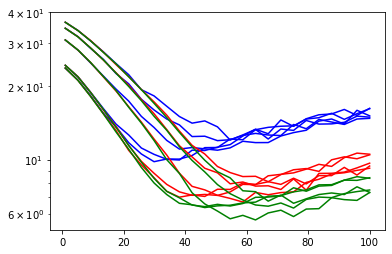

In [17]:
results_laplace = [[len(lambda_space)*[0] for j in range(img_num)] for i in range(len(mspace))];

utils.reset_seeds();
for i in range(len(mspace)):
    m = mspace[i];
    
    for j in range(img_num):
    x_true = CIFAR.getImageAsVector(test_loader, i);
    
        for k in range(len(lambda_space)):
            lamb = lambda_space[k];

            accum = 0;
            for n in range(repetitions):
                A, q = generateMeasurements_Laplace_dithering(x_true, m, noise ,lamb);
                y, acc, _ = CIFAR.reconstruct_regularized_dithering(A, q, lamb, x_true, projector, learning_param = 0.2, iterations = 25);
                accum += acc;
            results_laplace[i][j][k] = accum/repetitions;
            print(lamb);

        clear_output(wait=True);
        plt.yscale('log');
        for ii in range(i+1):
            for jj in range(j+1):
                col = 'b';
                if ii == 0:
                    col = 'b';
                elif ii == 1:
                    col = 'r';
                else:
                    col = 'g';
                plt.plot(lambda_space, results_laplace[ii][jj], c=col);
        plt.show();

# Plotting

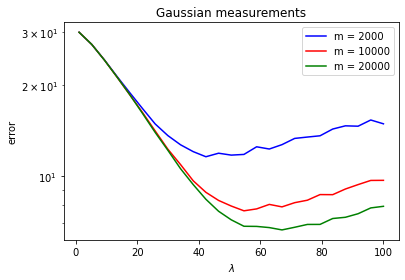

In [8]:
for i in range(len(mspace)):
    col = 'b';
    if i == 0:
        col = 'b';
    elif i == 1:
        col = 'r';
    else:
        col = 'g';
    plt.plot(lambda_space, np.mean(results_gauss[i], axis = 0), c=col);
        
plt.yscale("log");
plt.legend(["m = 2000", "m = 10000", "m = 20000"]);
plt.xlabel(r"$\lambda$");
plt.ylabel("error");
plt.title("Gaussian measurements");

plt.savefig("results_images/cifar_dithering_gaussian_lambda.png", dpi=200);

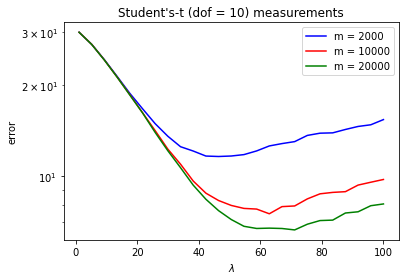

In [9]:
for i in range(len(mspace)):
    col = 'b';
    if i == 0:
        col = 'b';
    elif i == 1:
        col = 'r';
    else:
        col = 'g';
    plt.plot(lambda_space, np.mean(results_stt10[i], axis = 0), c=col);
        
plt.yscale("log");
plt.legend(["m = 2000", "m = 10000", "m = 20000"]);
plt.xlabel(r"$\lambda$");
plt.ylabel("error");

plt.title("Student's-t (dof = 10) measurements");

plt.savefig("results_images/cifar_dithering_stt10_lambda.png", dpi=200);

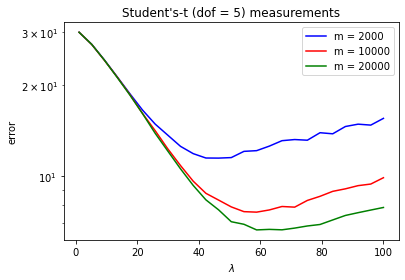

In [10]:
for i in range(len(mspace)):
    col = 'b';
    if i == 0:
        col = 'b';
    elif i == 1:
        col = 'r';
    else:
        col = 'g';
    plt.plot(lambda_space, np.mean(results_stt5[i], axis = 0), c=col);
        
plt.yscale("log");
plt.legend(["m = 2000", "m = 10000", "m = 20000"]);
plt.xlabel(r"$\lambda$");
plt.ylabel("error");

plt.title("Student's-t (dof = 10) measurements");

plt.savefig("image_results/cifar_dithering_stt10_lambda.png", dpi=200);
        
plt.yscale("log");
plt.legend(["m = 2000", "m = 10000", "m = 20000"]);
plt.xlabel(r"$\lambda$");
plt.ylabel("error");

plt.title("Student's-t (dof = 5) measurements");

plt.savefig("results_images/cifar_dithering_stt5_lambda.png", dpi=200);

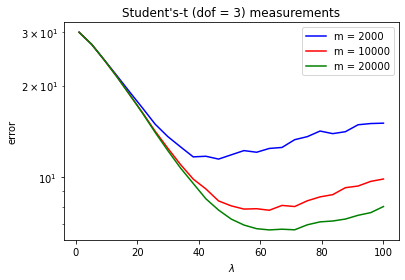

In [11]:
for i in range(len(mspace)):
    col = 'b';
    if i == 0:
        col = 'b';
    elif i == 1:
        col = 'r';
    else:
        col = 'g';
    plt.plot(lambda_space, np.mean(results_stt3[i], axis = 0), c=col);
        
plt.yscale("log");
plt.legend(["m = 2000", "m = 10000", "m = 20000"]);
plt.xlabel(r"$\lambda$");
plt.ylabel("error");

plt.title("Student's-t (dof = 3) measurements");

plt.savefig("results_images/cifar_dithering_stt3_lambda.png", dpi=200);

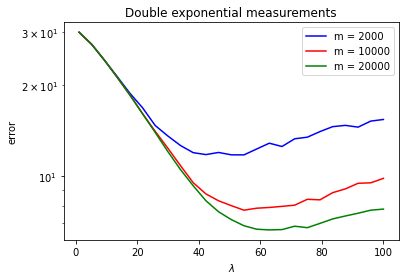

In [12]:
for i in range(len(mspace)):
    col = 'b';
    if i == 0:
        col = 'b';
    elif i == 1:
        col = 'r';
    else:
        col = 'g';
    plt.plot(lambda_space, np.mean(results_laplace[i], axis = 0), c=col);
        
plt.yscale("log");
plt.legend(["m = 2000", "m = 10000", "m = 20000"]);
plt.xlabel(r"$\lambda$");
plt.ylabel("error");

plt.title("Double exponential measurements");

plt.savefig("results_images/cifar_dithering_lapl_lambda.png", dpi=200);

In [24]:
utils.saveData((lambda_space, mspace, results_gauss, results_laplace, results_stt10, results_stt5, results_stt3), "results_data/cifar_lambda_generative.data");

In [7]:
(lambda_space, mspace, results_gauss, results_laplace, results_stt10, results_stt5, results_stt3) = utils.loadData("results_data/cifar_lambda_generative.data");